In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def t_test(mean1, sd1, mean2, sd2, N):
    stat_list = []
    p_list = []
    for _ in range(1000):
        sample1 = np.random.normal(loc = mean1, scale = sd1, size = N)
        sample2 = np.random.normal(loc = mean2, scale = sd2, size = N)
        stat, p = scipy.stats.ttest_ind(sample1, sample2)
        stat_list.append(stat)
        p_list.append(p)
    stat_list = np.array(stat_list)
    p_list = np.array(p_list)
    accepted_h0 = sum(p_list > 0.05)
    power = round(1 - accepted_h0/1000, 3)
    return stat_list, p_list, accepted_h0, power

## контроль 300±50, эксперимент 350±50, выборки 10, 30, 100



In [ ]:
s10, p10, er10, pow10 = t_test(300, 50, 350, 50, 10)
s30, p30, er30, pow30 = t_test(300, 50, 350, 50, 30)
s100, p100, er100, pow100 = t_test(300, 50, 350, 40, 100)

Text(-4, 0.3, 'N: 100\nNumber of accepted H0: 0\nPower: 1.0')

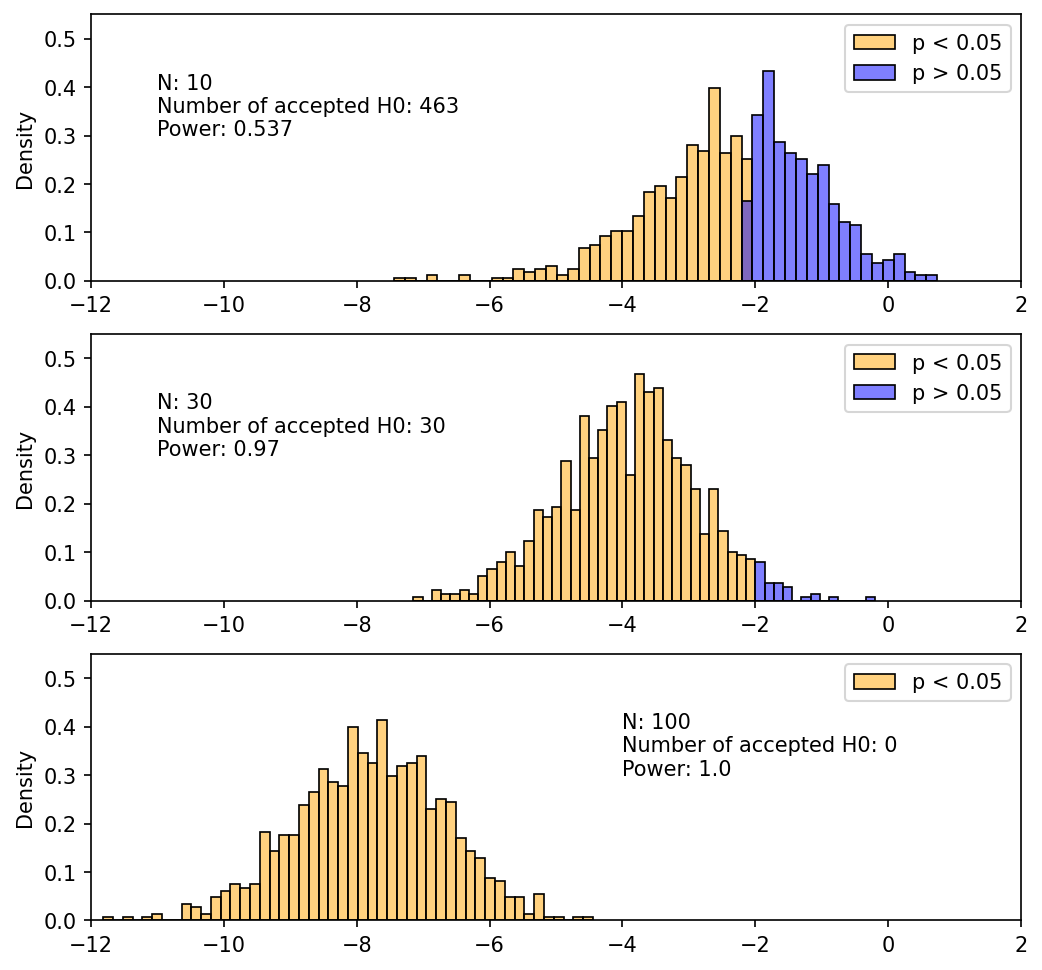

In [ ]:
np.random.seed(88)
fig, ax = plt.subplots(nrows = 3, figsize = (8, 8), dpi = 150)
sns.histplot(x=s10, stat = 'density', bins = 50, hue = p10 < 0.05, ax = ax[0], palette = sns.color_palette(["blue", "orange"]))
sns.histplot(x=s30, stat = 'density', bins = 50, hue = p30 < 0.05, ax = ax[1], palette = sns.color_palette(["blue", "orange"]))
sns.histplot(x=s100, stat = 'density', bins = 50, hue = p100 < 0.05, ax = ax[2], palette = sns.color_palette(['orange']))
for i, n in enumerate([er10, er30, er100]):
    ax[i].set_xlim([-12, 2])
    ax[i].set_ylim([0, 0.55])
    ax[i].legend(labels=['p < 0.05', 'p > 0.05'])
    #exec(f'ax[{i}].text(-10, 0.2, "Number of accepted H0: {n}")')
ax[0].text(-11, 0.3,  f"N: {10}\nNumber of accepted H0: {er10}\nPower: {pow10}")
ax[1].text(-11, 0.3,  f"N: {30}\nNumber of accepted H0: {er30}\nPower: {pow30}")
ax[2].text(-4, 0.3,  f"N: {100}\nNumber of accepted H0: {er100}\nPower: {pow100}")


## контроль 300±50, эксперимент 450±50, выборки 10, 30, 100

In [ ]:
s10, p10, er10, pow10 = t_test(300, 50, 450, 50, 10)
s30, p30, er30, pow30 = t_test(300, 50, 450, 50, 30)
s100, p100, er100, pow100 = t_test(300, 50, 450, 40, 100)

Text(0.5, 1.0, 'Контроль 300±50, эксперимент 450±50, выборки 10, 30, 100')

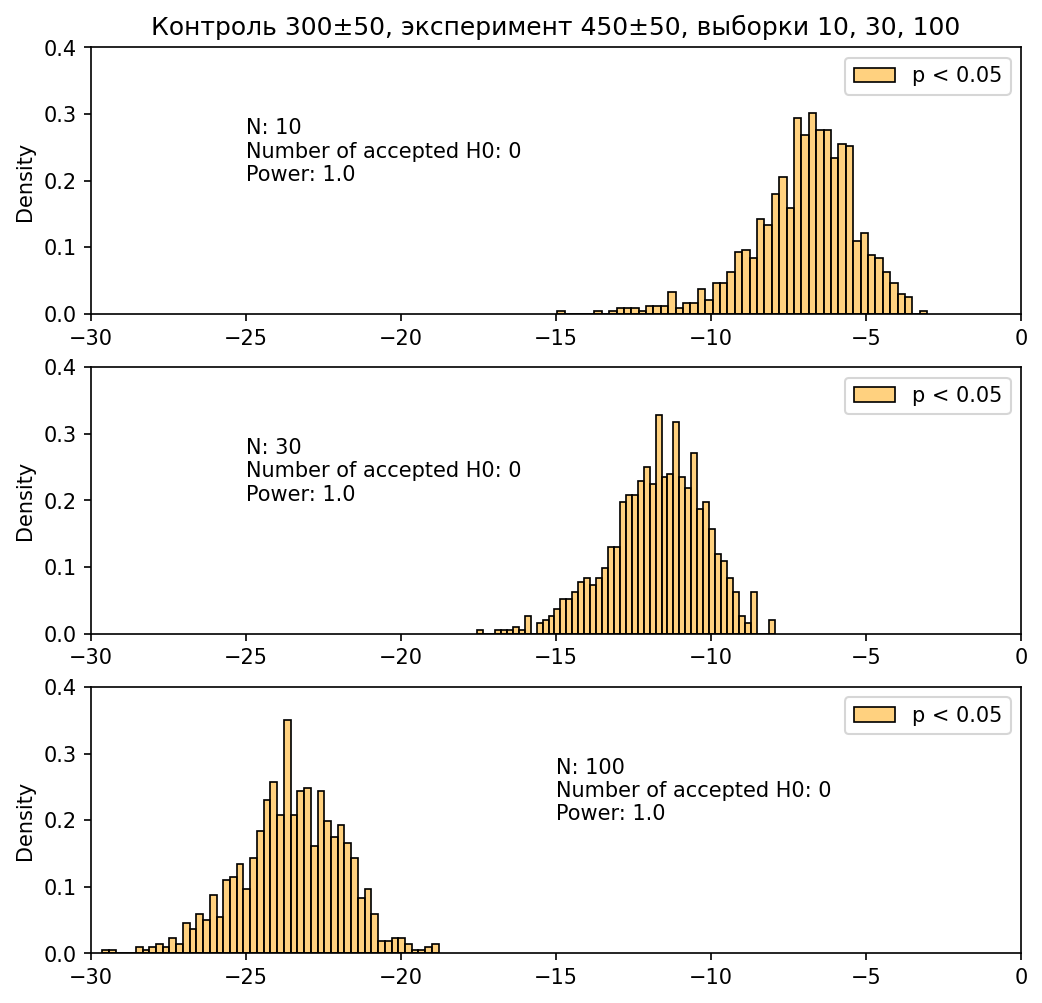

In [ ]:
np.random.seed(88)
fig, ax = plt.subplots(nrows = 3, figsize = (8, 8), dpi =150)
sns.histplot(x=s10, stat = 'density', bins = 50, hue = p10 < 0.05, ax = ax[0], palette = sns.color_palette(["orange"]))
sns.histplot(x=s30, stat = 'density', bins = 50, hue = p30 < 0.05, ax = ax[1], palette = sns.color_palette(["orange"]))
sns.histplot(x=s100, stat = 'density', bins = 50, hue = p100 < 0.05, ax = ax[2], palette = sns.color_palette(["orange"]))
for i, n in enumerate([er10, er30, er100]):
    ax[i].set_xlim([-30, 0])
    ax[i].set_ylim([0, 0.4])
    ax[i].legend(labels=['p < 0.05', 'p > 0.05'])
ax[0].text(-25, 0.2,  f"N: {10}\nNumber of accepted H0: {er10}\nPower: {pow10}")
ax[1].text(-25, 0.2,  f"N: {30}\nNumber of accepted H0: {er30}\nPower: {pow30}")
ax[2].text(-15, 0.2,  f"N: {100}\nNumber of accepted H0: {er100}\nPower: {pow100}")
ax[0].set_title('Контроль 300±50, эксперимент 450±50, выборки 10, 30, 100')

Видим, что для обнаружения различия 50 выборка размера 10 не подходит, так как мощность всего 0.537. При размере выборки 30 мощность уже 0.97, что в целом хорошо (Однако, все зависит от контекста. Может, нам надо обнаруживать эффект строго в 100% случаев)  
Обнаружить более выраженный эффект удается в 100% случаев даже при выборке 10

# Критерий Манна-Уитни

In [ ]:
def mannwhitneyu_criterion(mean1, sd1, mean2, sd2, N):
    stat_list = []
    p_list = []
    for _ in range(1000):
        sample1 = np.random.normal(loc = mean1, scale = sd1, size = N)
        sample2 = np.random.normal(loc = mean2, scale = sd2, size = N)
        stat, p = scipy.stats.mannwhitneyu(sample1, sample2)
        stat_list.append(stat)
        p_list.append(p)
    stat_list = np.array(stat_list)
    p_list = np.array(p_list)
    accepted_h0 = sum(p_list > 0.05)
    power = round(1 - accepted_h0/1000, 3)
    return stat_list, p_list, accepted_h0, power

In [ ]:
s10, p10, er10, pow10 = mannwhitneyu_criterion(300, 50, 350, 50, 10)
s30, p30, er30, pow30 = mannwhitneyu_criterion(300, 50, 350, 50, 30)
s100, p100, er100, pow100 = mannwhitneyu_criterion(300, 50, 350, 40, 100)

Text(1100, 0.001, 'N: 100\nNumber of accepted H0: 0\nPower: 1.0')

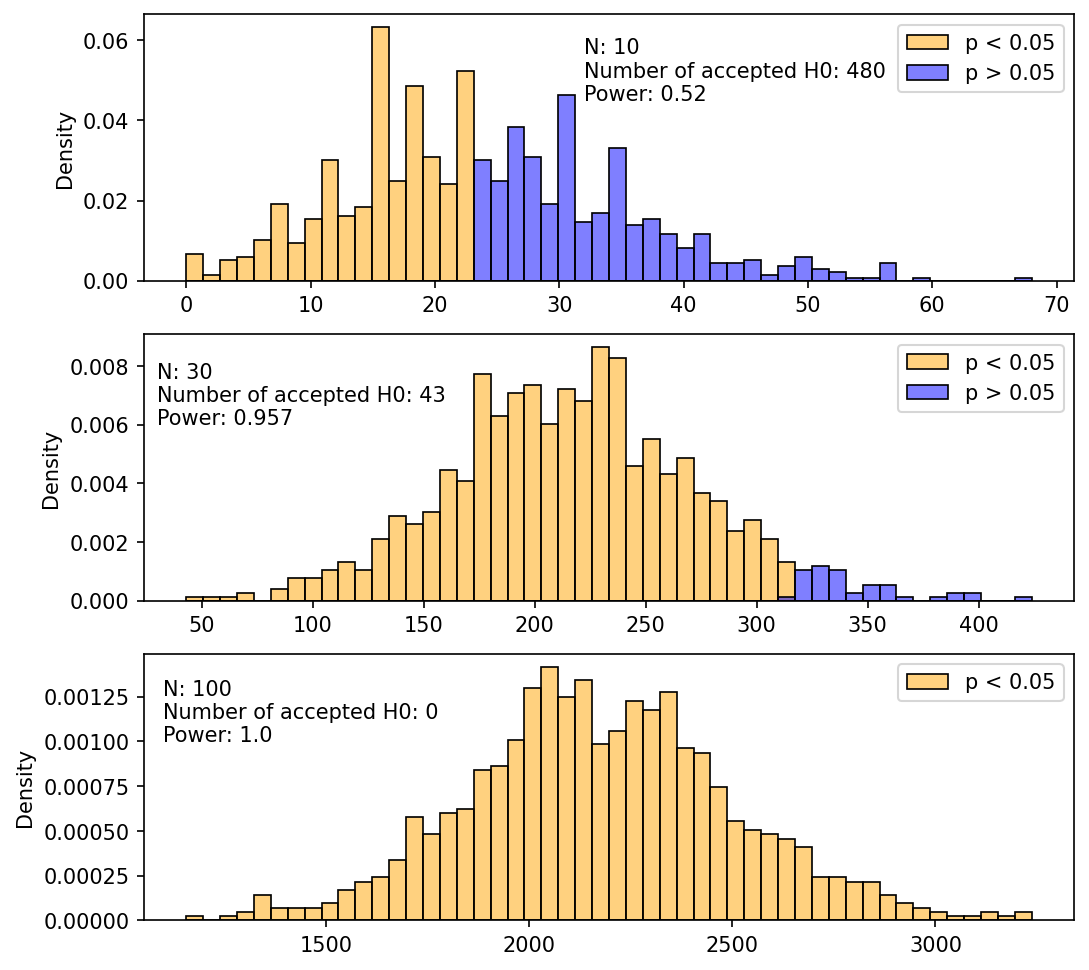

In [ ]:
np.random.seed(88)
fig, ax = plt.subplots(nrows = 3, figsize = (8, 8), dpi = 150)
sns.histplot(x=s10, stat = 'density', bins = 50, hue = p10 < 0.05, ax = ax[0], palette = sns.color_palette(["blue", "orange"]))
sns.histplot(x=s30, stat = 'density', bins = 50, hue = p30 < 0.05, ax = ax[1], palette = sns.color_palette(["blue", "orange"]))
sns.histplot(x=s100, stat = 'density', bins = 50, hue = p100 < 0.05, ax = ax[2], palette = sns.color_palette(['orange']))
for i, n in enumerate([er10, er30, er100]):
    #ax[i].set_xlim([0, 3500])
    #ax[i].set_ylim([0, 0.55])
    ax[i].legend(labels=['p < 0.05', 'p > 0.05'])
    #exec(f'ax[{i}].text(-10, 0.2, "Number of accepted H0: {n}")')
ax[0].text(32, 0.045,  f"N: {10}\nNumber of accepted H0: {er10}\nPower: {pow10}")
ax[1].text(30, 0.006,  f"N: {30}\nNumber of accepted H0: {er30}\nPower: {pow30}")
ax[2].text(1100, 0.001,  f"N: {100}\nNumber of accepted H0: {er100}\nPower: {pow100}")

In [ ]:
print(f'N=10, t-test power: 0.537 , mann-whitneyu: 0.52, MW/T={0.52/0.537}')
print(f'N=30, t-test power: 0.97, mann-whitneyu: 0.957, MW/T={0.957/0.97}')
print(f'N=100, t-test power: 1.00, mann-whitneyu: 1.00, MW/T=1.00')

N=10, t-test power: 0.537 , mann-whitneyu: 0.52, MW/T=0.9683426443202979
N=30, t-test power: 0.97, mann-whitneyu: 0.957, MW/T=0.9865979381443298
N=100, t-test power: 1.00, mann-whitneyu: 1.00, MW/T=1.00


В данном примере критерий Манна-Уитни демонстрирует мощность, сопоставимую с t-тестом

In [ ]:
t_list_10, mw_list_10, t_list_30, mw_list_30 = [], [], [], []

for _ in range(100):
    s10, p10, er10, pow10 = t_test(300, 50, 350, 50, 10)
    t_list_10.append(pow10)
    s10, p10, er10, pow10 = mannwhitneyu_criterion(300, 50, 350, 50, 10)
    mw_list_10.append(pow10)

for _ in range(100):
    s30, p30, er30, pow30 = t_test(300, 50, 350, 50, 30)
    t_list_30.append(pow30)
    s30, p30, er30, pow30 = mannwhitneyu_criterion(300, 50, 350, 50, 30)
    mw_list_30.append(pow30)

In [ ]:
df

,T_10,T_30,MW_10,MW_30
0,1.0,0.507,0.516,0.956
1,1.0,0.507,0.528,0.961
2,1.0,0.507,0.535,0.949
3,1.0,0.507,0.490,0.950
4,1.0,0.507,0.529,0.947
...,...,...,...,...
95,1.0,0.507,0.503,0.956
96,1.0,0.507,0.516,0.960
97,1.0,0.507,0.543,0.958
98,1.0,0.507,0.509,0.965


In [ ]:
df = pd.DataFrame({'T_10': t_list_10,
                   'T_30': t_list_30,
                   'MW_10': mw_list_10,
                   'MW_30': mw_list_30})

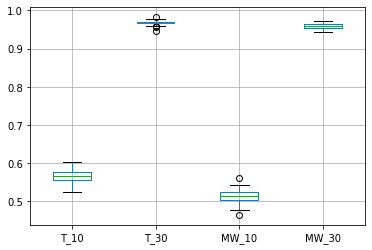

In [ ]:
df.boxplot()

(0.93, 1.0)

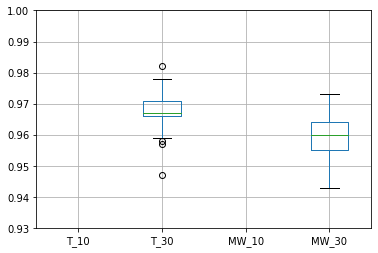

In [ ]:
fig, ax = plt.subplots()
df.boxplot(ax=ax)
ax.set_ylim((0.93, 1))

In [ ]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

np.random.seed(42)
print('Before scaling:')
print('mean:', sample.mean())
print('std:', sample.std())

print('After scaling:')
print('mean:', sample_scaled.mean())
print('std:', sample_scaled.std())

Before scaling:
mean: 10.11668429112048
std: 19.659248619364664
After scaling:
mean: 9.414691248821327e-17
std: 1.0


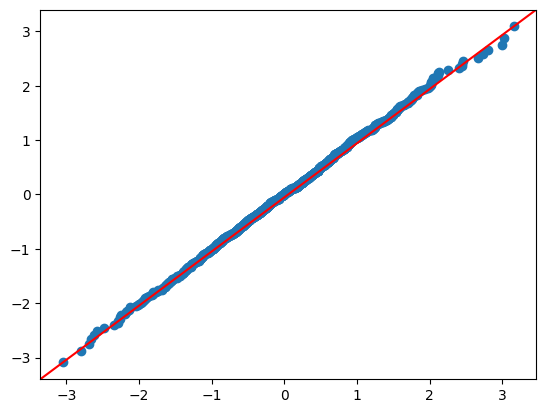

In [ ]:
# generate sample from normal distribution
sample = np.random.normal(10, 20, size=1000)

# Scaling
sample_scaled = (sample - sample.mean()) / sample.std()

# Generate same number of equally distributed quantiles
quantiles = [scipy.stats.norm.ppf(p) for p in np.linspace(0, 1, 1000)]
sample_scaled.sort()

# show QQ-plot
fig, ax = plt.subplots()
ax.scatter(sorted(sample_scaled), quantiles);
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='red');